In [119]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [120]:
data_frame = pd.read_csv("/content/Customer-Churn-Records.csv")

In [121]:
data_frame.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [122]:
data_frame.shape

(10000, 18)

In [123]:
data_frame.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [124]:
data_frame.duplicated().sum()

0

In [125]:
data_frame.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [126]:
data_frame

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [127]:
data_frame['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [128]:
data_frame['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [129]:
data_frame['Card Type'].value_counts()

Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64

In [130]:
data_frame = pd.get_dummies(data_frame, columns=['Gender', 'Geography', 'Card Type'], prefix=['Gender_', 'Geography_', 'Card Type_'])
data_frame.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Point Earned,Gender__Female,Gender__Male,Geography__France,Geography__Germany,Geography__Spain,Card Type__DIAMOND,Card Type__GOLD,Card Type__PLATINUM,Card Type__SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,...,464,True,False,True,False,False,True,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,1,...,456,True,False,False,False,True,True,False,False,False
2,502,42,8,159660.80,3,1,0,113931.57,1,1,...,377,True,False,True,False,False,True,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,0,...,350,True,False,True,False,False,False,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,0,...,425,True,False,False,False,True,False,True,False,False


In [131]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_frame)
scaled_data

array([[0.538     , 0.32432432, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.516     , 0.31081081, 0.1       , ..., 0.        , 0.        ,
        0.        ],
       [0.304     , 0.32432432, 0.8       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.718     , 0.24324324, 0.7       , ..., 0.        , 0.        ,
        1.        ],
       [0.844     , 0.32432432, 0.3       , ..., 1.        , 0.        ,
        0.        ],
       [0.884     , 0.13513514, 0.4       , ..., 0.        , 0.        ,
        0.        ]])

In [132]:
scaled_data_frame = pd.DataFrame(scaled_data, columns=data_frame.columns)
scaled_data_frame

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Point Earned,Gender__Female,Gender__Male,Geography__France,Geography__Germany,Geography__Spain,Card Type__DIAMOND,Card Type__GOLD,Card Type__PLATINUM,Card Type__SILVER
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,1.0,...,0.391600,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,1.0,...,0.382520,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,1.0,...,0.292849,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,0.0,...,0.262202,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,0.0,...,0.347333,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,0.0,0.0,...,0.205448,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9996,0.332,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490,0.0,0.0,...,0.740068,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9997,0.718,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390,1.0,1.0,...,0.505108,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9998,0.844,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,1.0,1.0,...,0.249716,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [133]:
X = scaled_data_frame.drop(columns=['Exited'])
y = scaled_data_frame['Exited']

In [134]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (8000, 20)
Shape of X_test: (2000, 20)
Shape of y_train: (8000,)
Shape of y_test: (2000,)


In [135]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(5, input_dim=20, activation='relu'))
model.add(Dense(3, input_dim=20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [136]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 5)                 105       
                                                                 
 dense_21 (Dense)            (None, 3)                 18        
                                                                 
 dense_22 (Dense)            (None, 1)                 4         
                                                                 
Total params: 127 (508.00 Byte)
Trainable params: 127 (508.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [137]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [138]:
# Fit the model
history = model.fit(X_train, y_train, epochs=15, batch_size=100, validation_split=0.2)

Epoch 1/15
64/64 [==============================] - 1s 5ms/step - loss: 0.6085 - accuracy: 0.7467 - val_loss: 0.5422 - val_accuracy: 0.7981
Epoch 2/15
64/64 [==============================] - 0s 3ms/step - loss: 0.5087 - accuracy: 0.7934 - val_loss: 0.4732 - val_accuracy: 0.7981
Epoch 3/15
64/64 [==============================] - 0s 3ms/step - loss: 0.4531 - accuracy: 0.7934 - val_loss: 0.4246 - val_accuracy: 0.7981
Epoch 4/15
64/64 [==============================] - 0s 2ms/step - loss: 0.4064 - accuracy: 0.7934 - val_loss: 0.3766 - val_accuracy: 0.7981
Epoch 5/15
64/64 [==============================] - 0s 3ms/step - loss: 0.3506 - accuracy: 0.8078 - val_loss: 0.3082 - val_accuracy: 0.8481
Epoch 6/15
64/64 [==============================] - 0s 4ms/step - loss: 0.2725 - accuracy: 0.8889 - val_loss: 0.2290 - val_accuracy: 0.9362
Epoch 7/15
64/64 [==============================] - 0s 3ms/step - loss: 0.2010 - accuracy: 0.9588 - val_loss: 0.1664 - val_accuracy: 0.9856
Epoch 8/15
64/64 [==

In [139]:
predictions = model.predict(X_test)
predicted_classes = np.where(predictions > 0.5, 1, 0)

63/63 [==============================] - 0s 1ms/step


In [140]:
predicted_classes

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [141]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, predicted_classes)

# Print the accuracy
print("Accuracy:", accuracy)


Accuracy: 0.999


In [142]:
history.history

{'loss': [0.6084524393081665,
  0.5087008476257324,
  0.4531056880950928,
  0.40635231137275696,
  0.3505725562572479,
  0.2724509537220001,
  0.20100921392440796,
  0.14416150748729706,
  0.10133734345436096,
  0.071214459836483,
  0.05152863636612892,
  0.03876323997974396,
  0.030519913882017136,
  0.02490631490945816,
  0.021152570843696594],
 'accuracy': [0.7467187643051147,
  0.7934374809265137,
  0.7934374809265137,
  0.7934374809265137,
  0.807812511920929,
  0.8889062404632568,
  0.9587500095367432,
  0.9921875,
  0.9981250166893005,
  0.9984375238418579,
  0.9984375238418579,
  0.9984375238418579,
  0.9984375238418579,
  0.9984375238418579,
  0.9984375238418579],
 'val_loss': [0.5422179102897644,
  0.47315478324890137,
  0.42456281185150146,
  0.37657979130744934,
  0.3081977069377899,
  0.22897596657276154,
  0.16638299822807312,
  0.11748872697353363,
  0.08247143030166626,
  0.05882735550403595,
  0.04335770756006241,
  0.03350496292114258,
  0.026976481080055237,
  0.0225

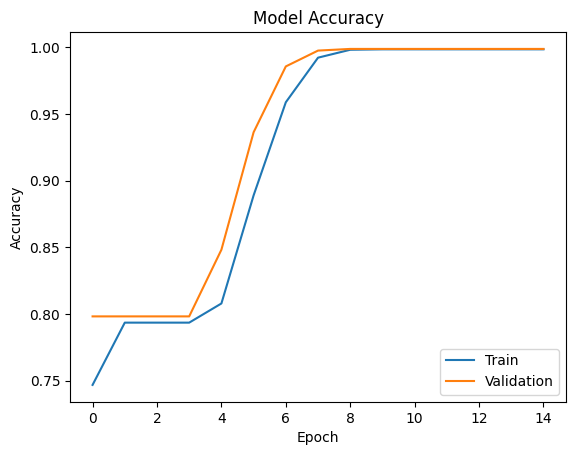

In [143]:
import matplotlib.pyplot as plt
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

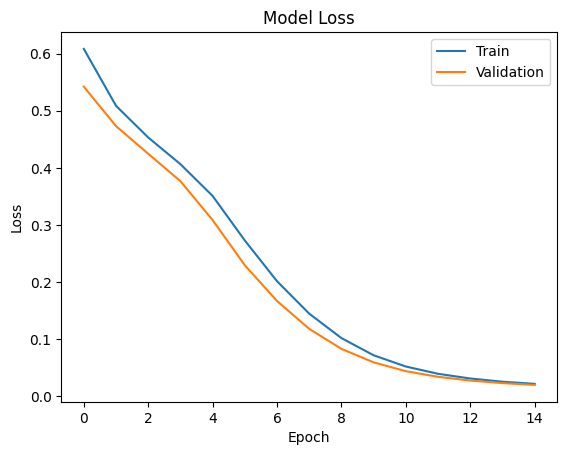

In [144]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()